# South China Pole Compilation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
from mpl_toolkits.basemap import Basemap

## Poles

The following post-late Paleozoic poles were taken from the compilation in Wu et al. (2017), Table 1:

In [2]:
Wu2017_df = pd.read_csv('Wu2017a_SouthChina.csv')

The following Silurian pole was taken from Huang et al. (2000):

In [3]:
Huang2000_lat = 14.9
Huang2000_lon = 196.1
Huang2000_a95 = 5.1
Huang2000_age = 430

The following late Ordovician pole was taken from Han et al. (2015):

In [4]:
Han2015_lat = -45.8
Han2015_lon = 191.3
Han2015_a95 = np.sqrt(4.2 * 2.4)
Han2015_age = 456

The following middle Cambrian pole was taken from Yang et al. (2004):

In [5]:
Yang2004_lat = -51.3
Yang2004_lon = 166.0
Yang2004_a95 = np.sqrt(4.4 * 8.6)
Yang2004_age = 510

The following Ediacaran pole was taken from Macouin et al. (2004):

In [6]:
Macouin2004_lat = 0.6
Macouin2004_lon = 196.9
Macouin2004_a95 = np.sqrt(4.5 * 9.0)
Macouin2004_age = 584

The following Neoproterozoic poles were taken from the compilation in Zhang et al. (2013), Table 2, with the age of the Xiaofeng dykes modified according to Wang et al. (2016):

In [7]:
Zhang2013_df = pd.DataFrame({'lat':[9.3,0.2,3.4,13.9,2.2,13.5],
                             'lon':[165.9,151.2,163.6,165.3,153.4,91],
                             'a95':[4.3,np.sqrt(7.5*5.4),np.sqrt(2.7*2.1),np.sqrt(9.6*7.0),np.sqrt(13.1*9.4),
                                    np.sqrt(11.3*10.5)],
                             'age':[636,636,748,748,748,821]})

Compile all the poles into a master dataframe:

In [8]:
compiled = Zhang2013_df.copy()
j = len(compiled.index)

for i in range(len(Wu2017_df.index)):
    if np.isfinite(Wu2017_df['lonP_IFcorr'][i]):
        compiled.loc[j, 'lat'] = Wu2017_df['latP_IFcorr'][i]
        compiled.loc[j, 'lon'] = Wu2017_df['lonP_IFcorr'][i]
    else:
        compiled.loc[j, 'lat'] = Wu2017_df['latP'][i]
        compiled.loc[j, 'lon'] = Wu2017_df['lonP'][i]
    compiled.loc[j, 'a95'] = Wu2017_df['a95'][i]
    compiled.loc[j, 'age'] = Wu2017_df['Age (Ma)'][i]
    j = j + 1
    
compiled.loc[j, 'lat'] = Huang2000_lat
compiled.loc[j, 'lon'] = Huang2000_lon
compiled.loc[j, 'a95'] = Huang2000_a95
compiled.loc[j, 'age'] = Huang2000_age
j = j + 1

compiled.loc[j, 'lat'] = Han2015_lat
compiled.loc[j, 'lon'] = Han2015_lon
compiled.loc[j, 'a95'] = Han2015_a95
compiled.loc[j, 'age'] = Han2015_age
j = j + 1

compiled.loc[j, 'lat'] = Yang2004_lat
compiled.loc[j, 'lon'] = Yang2004_lon
compiled.loc[j, 'a95'] = Yang2004_a95
compiled.loc[j, 'age'] = Yang2004_age
j = j + 1

compiled.loc[j, 'lat'] = Macouin2004_lat
compiled.loc[j, 'lon'] = Macouin2004_lon
compiled.loc[j, 'a95'] = Macouin2004_a95
compiled.loc[j, 'age'] = Macouin2004_age
j = j + 1

compiled.sort_values('age', inplace=True)
compiled.reset_index(inplace=True, drop=True)

## Plots

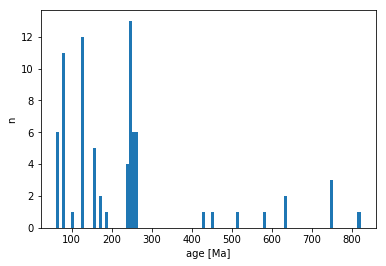

In [9]:
fig, ax = plt.subplots()
ax.hist(compiled['age'], bins=100)
ax.set_xlabel('age [Ma]')
ax.set_ylabel('n')
plt.show(fig)

/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


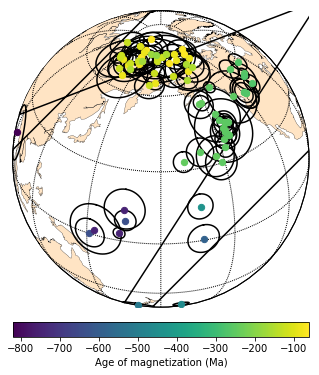

In [10]:
# initiate the figure
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=35,lon_0=180,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# Loop through the uploaded data and use the plot_pole_colorbar function
# (instead of plot_pole) to plot the individual poles. The input of this
# function is very similar to that of plot_pole but has the additional
# arguments of (1)AGE, (2)MINIMUM AND (3)MAXIMUM AGES OF PLOTTED POLES.
# Note that the ages are treated as negative numbers -- this just determines
# the direction of the colorbar.
for i in range(len(compiled.index)):
     m = ipmag.plot_pole_colorbar(pmap,
                                 compiled['lon'][i],
                                 compiled['lat'][i],
                                 compiled['a95'][i],
                                 -compiled['age'][i],
                                 -np.max(compiled['age']),
                                 -np.min(compiled['age']),
                                 markersize=40, color="k", alpha=1)       

pmap.colorbar(m,location='bottom',pad="5%",label='Age of magnetization (Ma)')

plt.show()

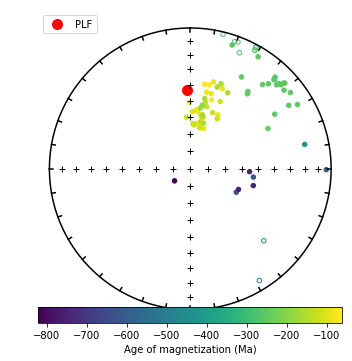

In [11]:
# approximately the mean coordinates of all sites on the E side of the mountains
slat = 27.9
slon = 108.8

# convert pole position to a direction at our Banxi sites
decs = np.array([])
incs = np.array([])
for i in range(len(compiled.index)):
    dec, inc = pmag.vgp_di(compiled['lat'][i], compiled['lon'][i], slat, slon)
    decs = np.append(decs, dec)
    incs = np.append(incs, inc)
        
# plot using a colormap
color_inds = (-compiled['age']+np.max(compiled['age']))/\
             (np.max(compiled['age'])-np.min(compiled['age']))
colors = [mpl.cm.viridis(i) for i in color_inds]
fig = plt.figure(num=0,figsize=(5,5))
ipmag.plot_net(0)
ipmag.plot_di(dec=decs,inc=incs,color=colors)

# PLF
s_igrf = ipmag.igrf([2017.5, 1, slat, slon])
ipmag.plot_di(dec=s_igrf[0],inc=s_igrf[1],color='r',markersize=100,legend='yes',label='PLF')

# add the colorbar (note that this colorbar is not tied to the scatter above - it is manually created)
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=-np.max(compiled['age']), vmax=-np.min(compiled['age']))
cax = inset_axes(plt.gca(), width='100%', height='5%', loc=8)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.set_label('Age of magnetization (Ma)')

plt.show(fig)